# Radio play consumption analysis

In [151]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [152]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [153]:
consumption_data = pd.read_csv('consumption_data.csv')
feed_station = pd.read_csv('feed_station_mapping.csv')

### 1. Consolidate the data 
* Fill default station as 'smp_station_name_default' which are not mapped with feed

In [154]:
data = pd.merge(consumption_data,feed_station,on='Feed_Id',how='left')
data['SMP_Station'] = data['SMP_Station'].fillna('smp_station_name_default')

In [155]:
data.head()

,Stamp,Track,Artist,Feed_Id,Feed_Name,SMP_Station
0,2019-06-07 18:38:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183,smp_station_name_294
1,2019-06-08 09:04:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183,smp_station_name_294
2,2019-06-08 19:51:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183,smp_station_name_294
3,2019-06-09 20:52:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183,smp_station_name_294
4,2019-06-10 11:06:00 +0000 UTC,Song_02,artist_08,feed_id_1377,feed_name_1183,smp_station_name_294


### 2. Data preprocessing and cleaning

In [156]:
#Remove the timezone from the Stamp 
data['Stamp'] = data['Stamp'].str.replace('\+0000 UTC','')

# Convert `Stamp` column into datetime
data['Stamp'] = pd.to_datetime(data['Stamp'],format="%Y-%m-%d %H:%M:%S")

#Sort dataframe by colum Stamp
data = data.sort_values(by=['Stamp'])

# get date column from Stamp
data['date'] = data['Stamp'].dt.date
data['date'] = pd.to_datetime(data['date'],format="%Y-%m-%d")

data.head()

,Stamp,Track,Artist,Feed_Id,Feed_Name,SMP_Station,date
268653,2019-01-01 00:02:00,Song_06,artist_05,feed_id_968,feed_name_223,smp_station_name_447,2019-01-01
298232,2019-01-01 00:03:00,Song_01,artist_02,feed_id_1080,feed_name_1577,smp_station_name_459,2019-01-01
292479,2019-01-01 00:03:00,Song_04,artist_07,feed_id_142,feed_name_63,smp_station_name_112,2019-01-01
13835,2019-01-01 00:10:00,Song_05,artist_03,feed_id_204,feed_name_184,smp_station_name_1068,2019-01-01
355536,2019-01-01 00:12:00,Song_05,artist_03,feed_id_1125,feed_name_958,smp_station_name_344,2019-01-01


In [157]:
## get datframe date wise, number of radio play consumption
date_wise_count = data.groupby(['date'])['Feed_Id'].count().reset_index()

## get data frame date wise, number of artist 
date_wise_artist = data.groupby(['date','Artist'])['Artist'].count().unstack(['Artist'])

## get dataframe date wise, number of track
date_wise_track = data.groupby(['date','Track '])['Track '].count().unstack(['Track '])


# Setting up the date as index
date_wise_count.set_index('date', inplace=True)

In [158]:
date_wise_count.head()

,Feed_Id
date,
2019-01-01,972
2019-01-02,737
2019-01-03,848
2019-01-04,904
2019-01-05,872


In [159]:
date_wise_artist.head()

Artist,artist_01,artist_02,artist_03,artist_04,artist_05,artist_06,artist_07,artist_08
date,,,,,,,,
2019-01-01,51.0,86.0,288.0,10.0,54.0,9.0,415.0,59.0
2019-01-02,48.0,78.0,266.0,9.0,52.0,12.0,219.0,53.0
2019-01-03,48.0,80.0,270.0,53.0,56.0,13.0,264.0,64.0
2019-01-04,56.0,83.0,272.0,10.0,55.0,11.0,360.0,57.0
2019-01-05,53.0,69.0,271.0,51.0,42.0,13.0,318.0,55.0


In [160]:
date_wise_track.head()

Track,Song_01,Song_02,Song_03,Song_04,Song_05,Song_06,Song_07,Song_08
date,,,,,,,,
2019-01-01,86.0,59.0,9.0,415.0,288.0,54.0,10.0,51.0
2019-01-02,78.0,53.0,12.0,219.0,266.0,52.0,9.0,48.0
2019-01-03,80.0,64.0,13.0,264.0,270.0,56.0,53.0,48.0
2019-01-04,83.0,57.0,11.0,360.0,272.0,55.0,10.0,56.0
2019-01-05,69.0,55.0,13.0,318.0,271.0,42.0,51.0,53.0


### 3. Data Analysis & Visualization

* **1. Find how radio plays consumption are trending over daily, weekly, monthly level.**

In [161]:
date_wise_count_weekly = date_wise_count.resample('W').sum()
date_wise_count_monthly = date_wise_count.resample('M').sum()

Text(0, 0.5, 'Total consumption')

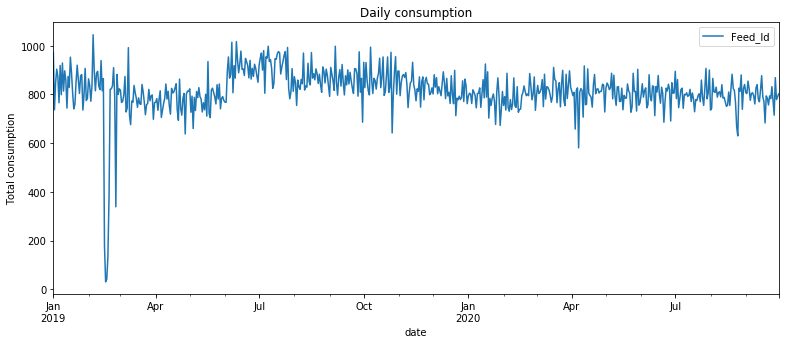

In [171]:
plotsize = (13, 5)
date_wise_count.plot(figsize=plotsize, title='Daily consumption')
plt.ylabel('Total consumption')

Text(0, 0.5, 'Total consumption')

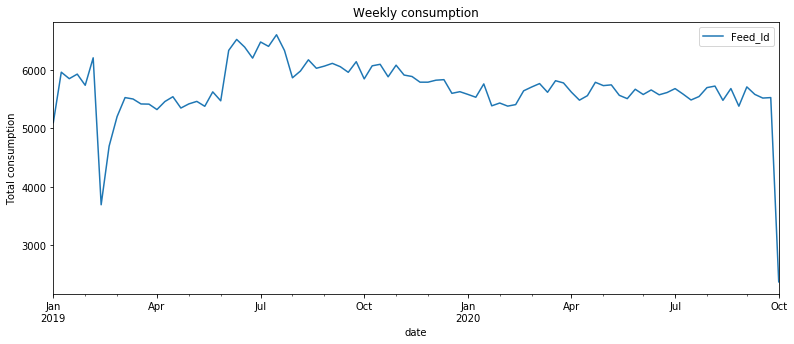

In [172]:
date_wise_count_weekly.plot(figsize=plotsize, title='Weekly consumption')
plt.ylabel('Total consumption')

* We can see that Radio plays consumption is down between Feb 2019 and March 2019, this is due to COVID 19.

Text(0, 0.5, 'Total consumption')

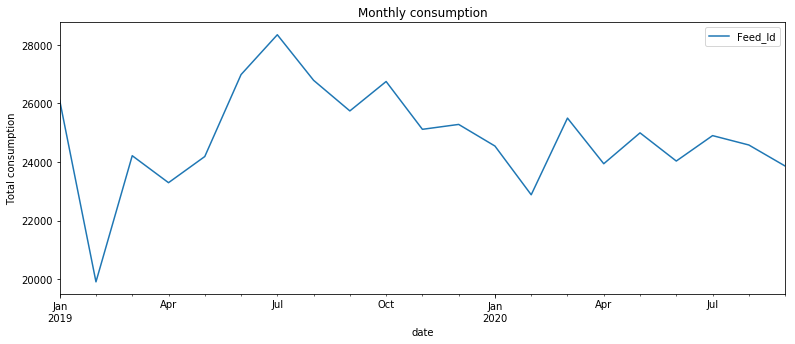

In [173]:
date_wise_count_monthly.plot(figsize=plotsize, title='Monthly consumption')
plt.ylabel('Total consumption')

* **2. Check trending the consumtion at artist level over dalily, weekely and monthly.**

In [165]:
date_wise_artist_weekly = date_wise_artist.resample('W').sum()
date_wise_artist_monthly = date_wise_artist.resample('M').sum()

Text(0, 0.5, 'Total consumption')

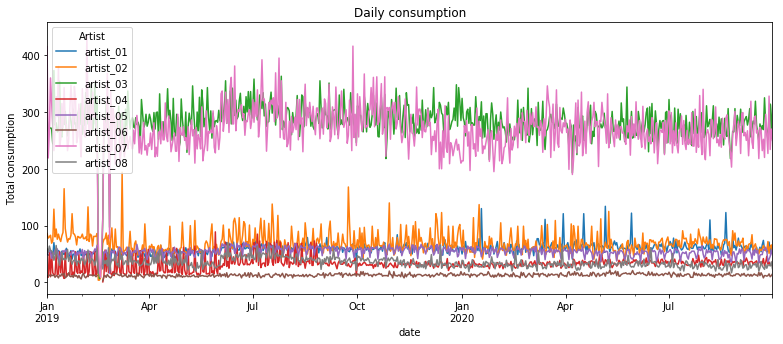

In [174]:
date_wise_artist.plot(figsize=plotsize, title='Daily consumption')
plt.ylabel('Total consumption')

Text(0, 0.5, 'Total consumption')

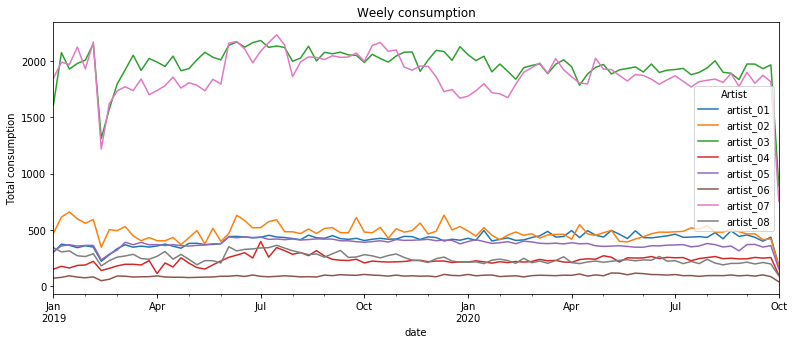

In [175]:
date_wise_artist_weekly.plot(figsize=plotsize, title='Weely consumption')
plt.ylabel('Total consumption')

Text(0, 0.5, 'Total consumption')

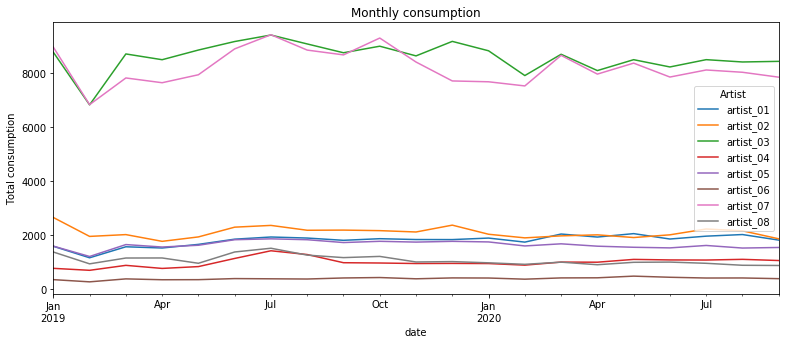

In [176]:
date_wise_artist_monthly.plot(figsize=plotsize, title='Monthly consumption')
plt.ylabel('Total consumption')

* **3. Check trending the consumption at track level over dalily, weekely and monthly.**

In [102]:
date_wise_track_weekly = date_wise_track.resample('W').sum()
date_wise_track_monthly = date_wise_track.resample('M').sum()

Text(0, 0.5, 'Total consumption')

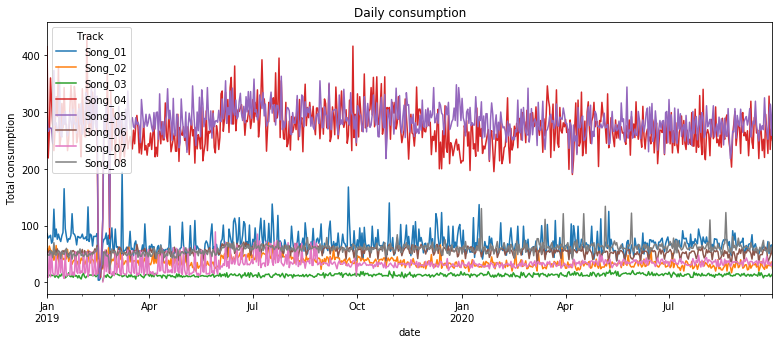

In [177]:
date_wise_track.plot(figsize=plotsize, title='Daily consumption')
plt.ylabel('Total consumption')

Text(0, 0.5, 'Total consumption')

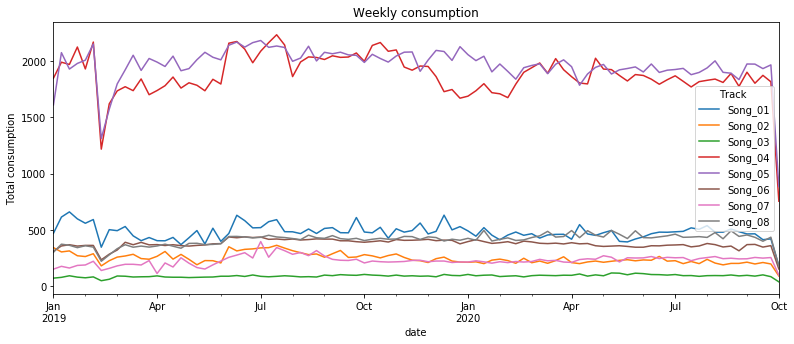

In [178]:
date_wise_track_weekly.plot(figsize=plotsize, title='Weekly consumption')
plt.ylabel('Total consumption')

Text(0, 0.5, 'Total consumption')

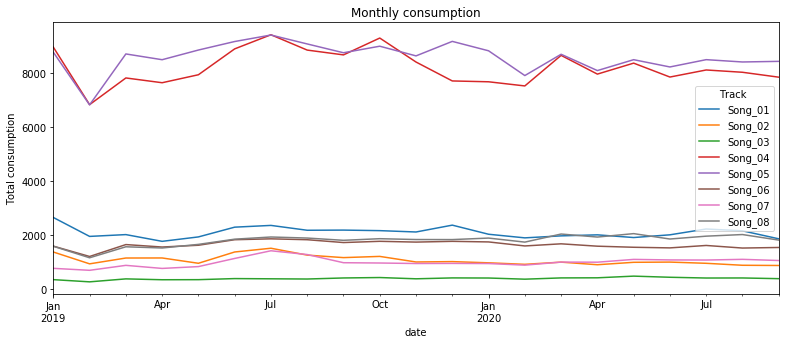

In [179]:
date_wise_track_monthly.plot(figsize=plotsize, title='Monthly consumption')
plt.ylabel('Total consumption')

**4. Check hourly consumption**

Text(0, 0.5, 'Total consumption')

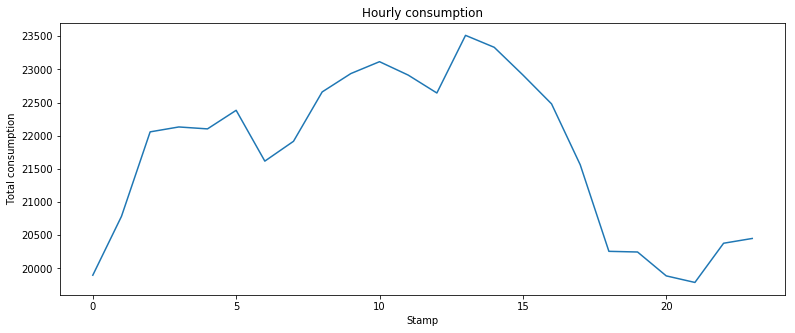

In [180]:
hour_wise_count = data.groupby(['Stamp'])['Feed_Id'].count()

hour_wise_count = hour_wise_count.resample('H').sum()

hour_wise_count = hour_wise_count.reset_index()
hour_wise_count['Stamp'] = hour_wise_count['Stamp'].dt.hour
hour_wise_count = hour_wise_count.groupby(['Stamp'])['Feed_Id'].sum()
hour_wise_count.plot(figsize=plotsize, title='Hourly consumption')
plt.ylabel('Total consumption')

* Consumption are more between 9 AM to 3 PM and There are less consumption from 7 PM to 2 AM.

**5. Check consumption day of week level**

Text(0, 0.5, 'Total consumption')

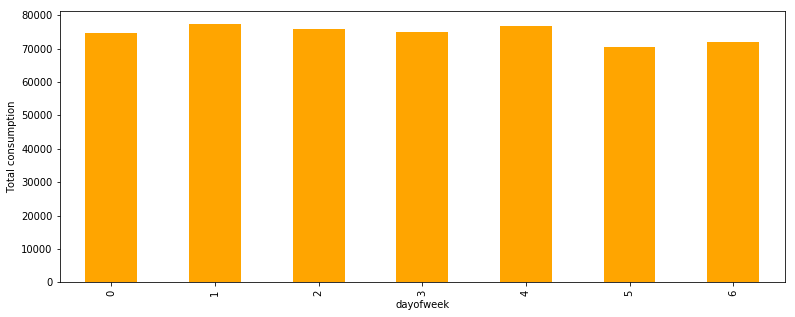

In [187]:
data['dayofweek'] = data['date'].dt.dayofweek

data.groupby(['dayofweek'])['Feed_Id'].count().plot(kind='bar',figsize=plotsize,color='orange')
plt.ylabel('Total consumption')

* It looks like that there is no impact of day of weeks on consumption.

**5. Artist level analysis**

Text(0, 0.5, 'Total consumption')

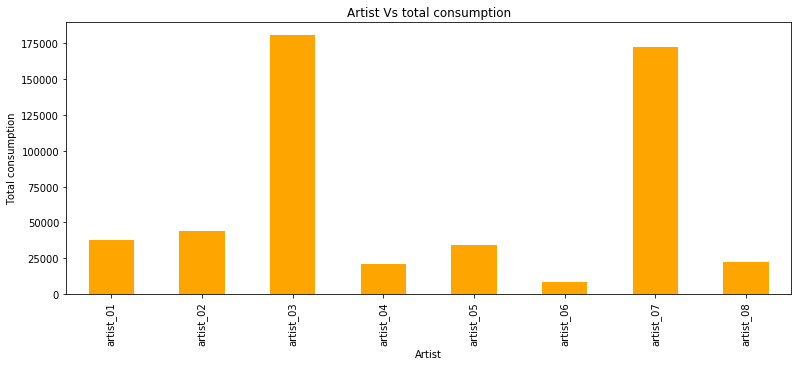

In [188]:
data.groupby(['Artist'])['Feed_Id'].count().plot(kind='bar',figsize=plotsize,color='orange',title='Artist Vs total consumption')
plt.ylabel('Total consumption')

**6. Track level Analysis**

Text(0, 0.5, 'Total consumption')

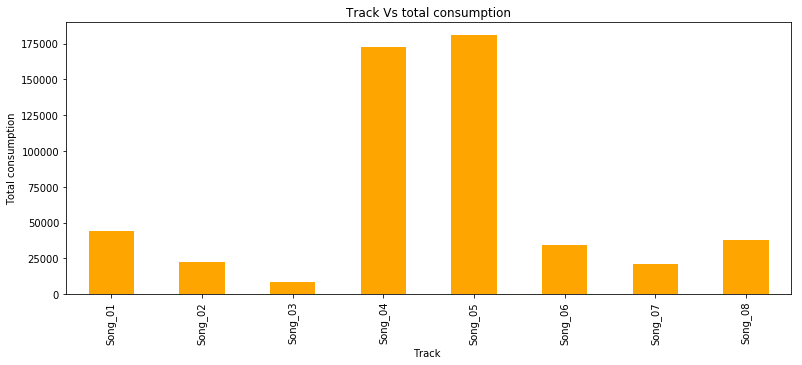

In [189]:
data.groupby(['Track '])['Feed_Id'].count().plot(kind='bar',figsize=plotsize,color='orange',title='Track Vs total consumption')
plt.ylabel('Total consumption')

**7. Top 10 station and Feed Name**

Text(0, 0.5, 'Total consumption')

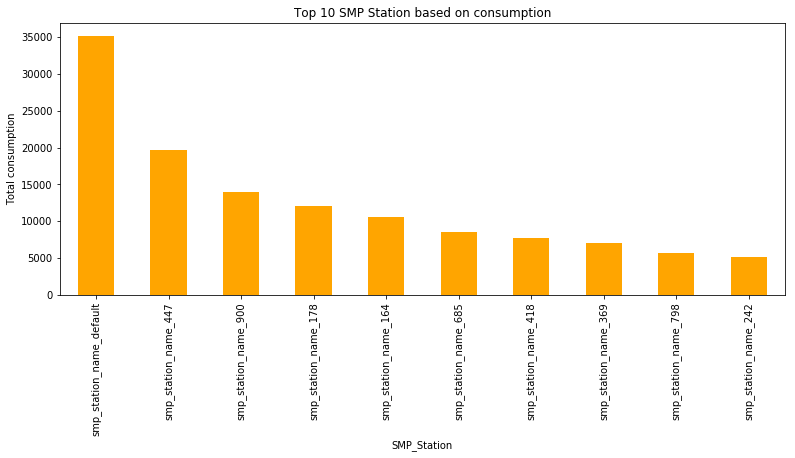

In [190]:
data.groupby(['SMP_Station'])['Feed_Id'].count().sort_values(ascending=False)[:10]\
        .plot(kind='bar',figsize=plotsize,color='orange',title='Top 10 SMP Station based on consumption')
plt.ylabel('Total consumption')

Text(0, 0.5, 'Total consumption')

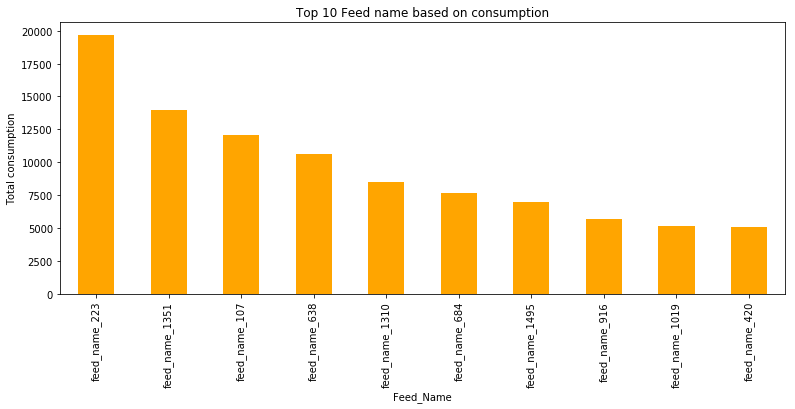

In [191]:
data.groupby(['Feed_Name'])['Feed_Id'].count().sort_values(ascending=False)[:10]\
        .plot(kind='bar',figsize=plotsize,color='orange',title='Top 10 Feed name based on consumption')
plt.ylabel('Total consumption')